## Objetivo da análise: agrupar clientes de uma operadora de cartão de crédito
#### Analisar os grupos de clientes mais e menos leais à marca

#### 

### Instalando os pacotes

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install scipy
!pip install scikit-learn
!pip install pingouin


In [26]:
### Importando os pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pingouin as pg
import plotly.express as px 
import plotly.io as pio
pio.renderers.default='browser'

#### Importando o banco de dados

In [27]:
dados_cartao = pd.read_csv('cartao_credito.csv')
## Fonte: https://www.kaggle.com/datasets/aryashah2k/credit-card-customer-data

#### Visualizando informações sobre os dados e variáveis

In [28]:
# Estrutura do banco de dados

print(dados_cartao.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB
None


#### Estatísticas descritivas das variáveis

In [29]:
# Primeiramente, vamos excluir as variáveis que não serão utilizadas

cartao_cluster = dados_cartao.drop(columns=['Sl_No', 'Customer Key'])

# Obtendo as estatísticas descritivas das variáveis

tab_descritivas = cartao_cluster.describe().T
print(tab_descritivas)
# Vamos padronizar as variáveis antes da clusterização!

                     count          mean           std     min      25%  \
Avg_Credit_Limit     660.0  34574.242424  37625.487804  3000.0  10000.0   
Total_Credit_Cards   660.0      4.706061      2.167835     1.0      3.0   
Total_visits_bank    660.0      2.403030      1.631813     0.0      1.0   
Total_visits_online  660.0      2.606061      2.935724     0.0      1.0   
Total_calls_made     660.0      3.583333      2.865317     0.0      1.0   

                         50%      75%       max  
Avg_Credit_Limit     18000.0  48000.0  200000.0  
Total_Credit_Cards       5.0      6.0      10.0  
Total_visits_bank        2.0      4.0       5.0  
Total_visits_online      2.0      4.0      15.0  
Total_calls_made         3.0      5.0      10.0  


#### Padronização por meio do Z-Score

In [30]:
# Aplicando o procedimento de ZScore
cartao_pad = cartao_cluster.apply(zscore, ddof=1)

# Visualizando o resultado do procedimento na média e desvio padrão
print(round(cartao_pad.mean(), 3))
print(round(cartao_pad.std(), 3))

Avg_Credit_Limit       0.0
Total_Credit_Cards     0.0
Total_visits_bank      0.0
Total_visits_online    0.0
Total_calls_made      -0.0
dtype: float64
Avg_Credit_Limit       1.0
Total_Credit_Cards     1.0
Total_visits_bank      1.0
Total_visits_online    1.0
Total_calls_made       1.0
dtype: float64


#### Gráfico 3D das observações

In [31]:
fig = px.scatter_3d(cartao_pad, 
                    x='Avg_Credit_Limit', 
                    y='Total_Credit_Cards', 
                    z='Total_visits_bank')
fig.show()

#### Identificação da quantidade de clusters (Método Elbow)

C:\Users\Khomp\USPesalqMBA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Khomp\USPesalqMBA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\Khomp\USPesalqMBA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Khomp\USPesalqMBA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\U

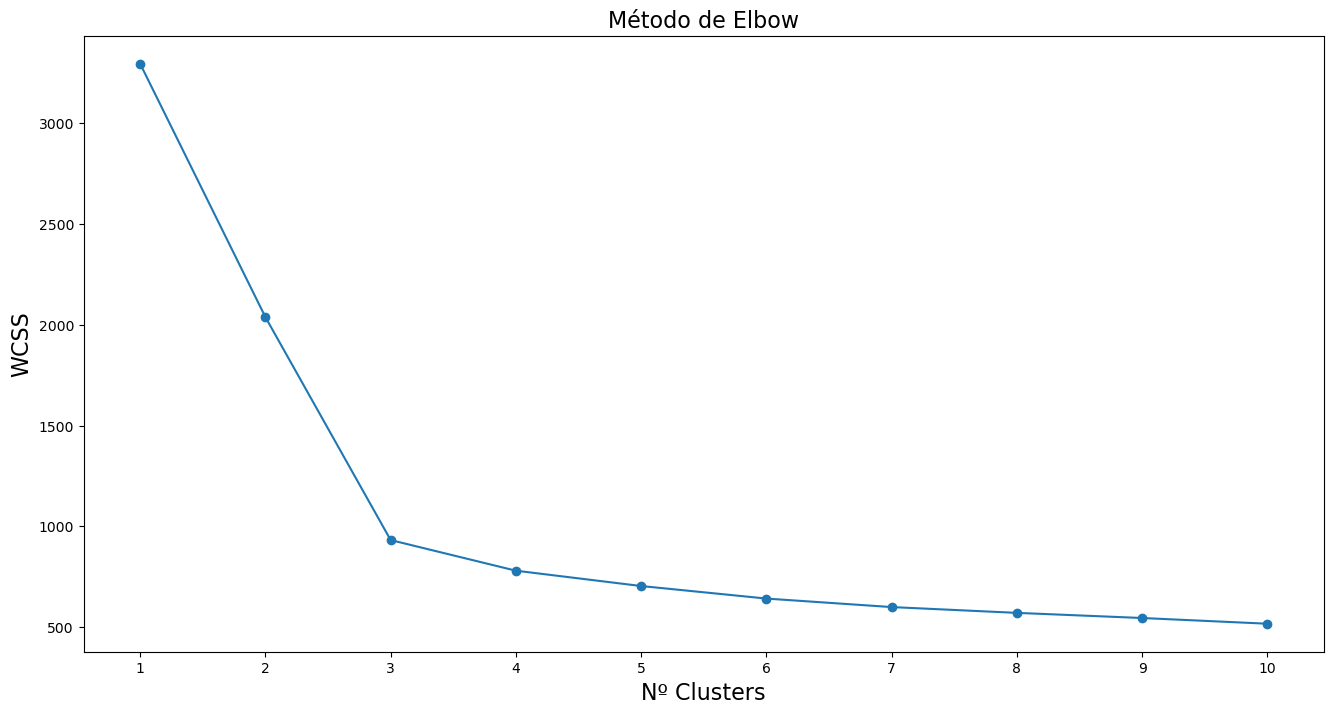

In [32]:
elbow = []
K = range(1,11) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(cartao_pad)
    elbow.append(kmeanElbow.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,11)) # ajustar range
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()

#### Identificação da quantidade de clusters (Método da Silhueta)

C:\Users\Khomp\USPesalqMBA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Khomp\USPesalqMBA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\Khomp\USPesalqMBA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Khomp\USPesalqMBA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\U

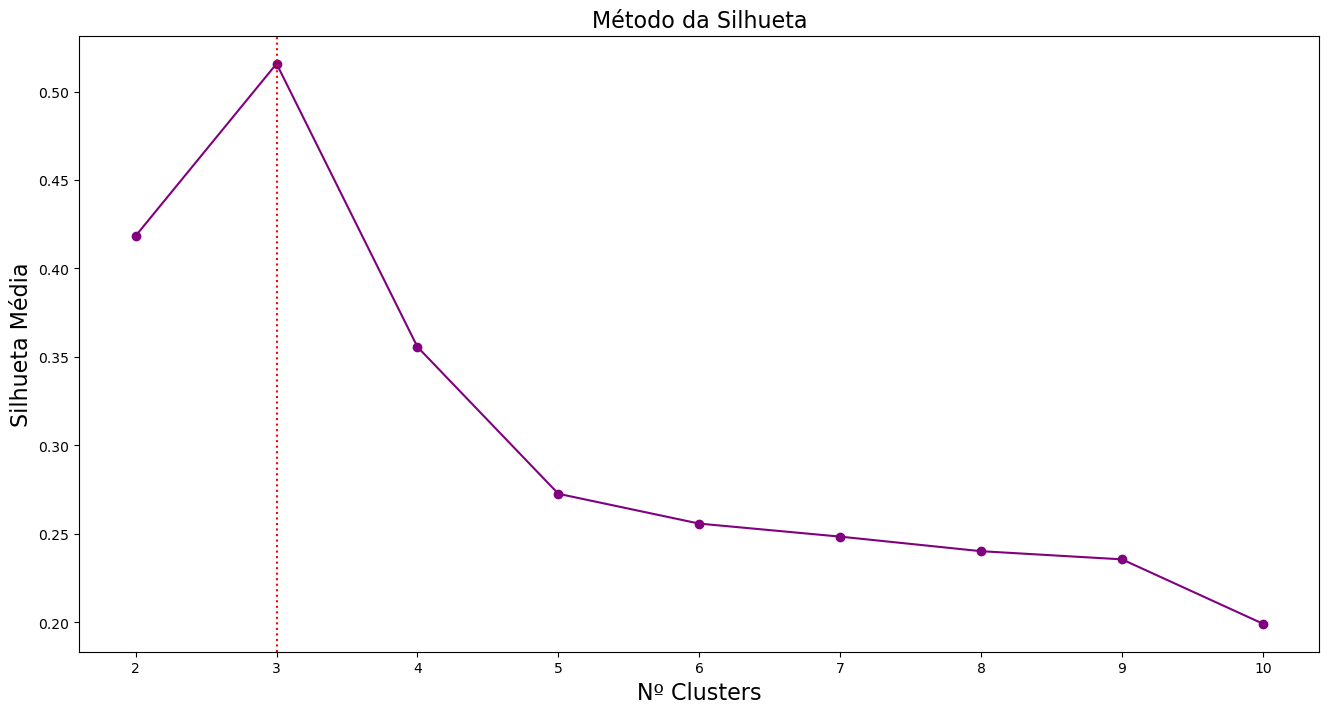

In [33]:
silhueta = []
I = range(2,11) # ponto de parada pode ser parametrizado manualmente
for i in I: 
    kmeansSil = KMeans(n_clusters=i, init='random', random_state=100).fit(cartao_pad)
    silhueta.append(silhouette_score(cartao_pad, kmeansSil.labels_))

plt.figure(figsize=(16,8))
plt.plot(range(2, 11), silhueta, color = 'purple', marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Silhueta Média', fontsize=16)
plt.title('Método da Silhueta', fontsize=16)
plt.axvline(x = silhueta.index(max(silhueta))+2, linestyle = 'dotted', color = 'red') 
plt.show()

#### Cluster Não Hierárquico K-means

In [34]:
# Vamos considerar 3 clusters, considerando as evidências anteriores!

kmeans_final = KMeans(n_clusters = 3, init = 'random', random_state=100).fit(cartao_pad)

# Gerando a variável para identificarmos os clusters gerados

kmeans_clusters = kmeans_final.labels_
cartao_cluster['cluster_kmeans'] = kmeans_clusters
cartao_pad['cluster_kmeans'] = kmeans_clusters
cartao_cluster['cluster_kmeans'] = cartao_cluster['cluster_kmeans'].astype('category')
cartao_pad['cluster_kmeans'] = cartao_pad['cluster_kmeans'].astype('category')

C:\Users\Khomp\USPesalqMBA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Khomp\USPesalqMBA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



#### Análise de variância de um fator (ANOVA)

In [35]:
# Interpretação do output:

## cluster_kmeans MS: indica a variabilidade entre grupos
## Within MS: indica a variabilidade dentro dos grupos
## F: estatística de teste (cluster_kmeans MS / Within MS)
## p-unc: p-valor da estatística F
## se p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais

# Avg_Credit_Limit
pg.anova(dv='Avg_Credit_Limit', 
         between='cluster_kmeans', 
         data=cartao_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,479.901385,179.098615
DF,2,657
MS,239.950692,0.272601
F,880.227938,NaN
p-unc,0.0,NaN
np2,0.728227,NaN


In [36]:
# Total_Credit_Cards
pg.anova(dv='Total_Credit_Cards', 
         between='cluster_kmeans', 
         data=cartao_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,478.078715,180.921285
DF,2,657
MS,239.039358,0.275375
F,868.050755,NaN
p-unc,0.0,NaN
np2,0.725461,NaN


In [37]:
# Total_visits_bank
pg.anova(dv='Total_visits_bank', 
         between='cluster_kmeans', 
         data=cartao_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,413.975651,245.024349
DF,2,657
MS,206.987826,0.372944
F,555.010154,NaN
p-unc,0.0,NaN
np2,0.628188,NaN


In [38]:
# Total_visits_online
pg.anova(dv='Total_visits_online', 
         between='cluster_kmeans', 
         data=cartao_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,540.564886,118.435114
DF,2,657
MS,270.282443,0.180267
F,1499.348962,NaN
p-unc,0.0,NaN
np2,0.820281,NaN


#### Gráfico 3D dos clusters

In [39]:
# Perspectiva 1

fig = px.scatter_3d(cartao_cluster, 
                    x='Avg_Credit_Limit', 
                    y='Total_Credit_Cards', 
                    z='Total_visits_online',
                    color='cluster_kmeans')
fig.show()

C:\Users\Khomp\USPesalqMBA\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [40]:
# Perspectiva 2

fig = px.scatter_3d(cartao_cluster, 
                    x='Avg_Credit_Limit', 
                    y='Total_Credit_Cards', 
                    z='Total_visits_bank',
                    color='cluster_kmeans')
fig.show()

C:\Users\Khomp\USPesalqMBA\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [41]:
# Perspectiva 3
fig = px.scatter_3d(cartao_cluster, 
                    x='Avg_Credit_Limit', 
                    y='Total_Credit_Cards', 
                    z='Total_calls_made',
                    color='cluster_kmeans')
fig.show()

C:\Users\Khomp\USPesalqMBA\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### Identificação das características dos clusters

In [42]:
# Agrupando o banco de dados

cartao_grupo = cartao_cluster.groupby(by=['cluster_kmeans'])

# Estatísticas descritivas por grupo

tab_desc_grupo = cartao_grupo.describe().T

C:\Users\Khomp\AppData\Local\Temp\ipykernel_13396\2841431459.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [43]:
tab_desc_grupo = cartao_grupo.describe().T
print(tab_desc_grupo)

cluster_kmeans                        0              1              2
Avg_Credit_Limit    count    224.000000      50.000000     386.000000
                    mean   12174.107143  141040.000000   33782.383420
                    std     5249.048524   34457.877272   22169.460696
                    min     3000.000000   84000.000000    5000.000000
                    25%     8000.000000  108750.000000   13000.000000
                    50%    12000.000000  145500.000000   31000.000000
                    75%    16000.000000  170000.000000   52000.000000
                    max    50000.000000  200000.000000  100000.000000
Total_Credit_Cards  count    224.000000      50.000000     386.000000
                    mean       2.410714       8.740000       5.515544
                    std        1.100783       1.274715       1.140069
                    min        1.000000       5.000000       2.000000
                    25%        1.000000       8.000000       4.000000
                    

# FIM